In [77]:
# 
# TASK 1: Feature Selection (FS)  
# 
# Dataset: "Bias_correction_ucl.csv"
# 
# Task to carry out: Use the “Bias correction of numerical prediction model temperature forecast” 
# dataset on Canvas. In this dataset the two outcomes are Next_Tmax and Next_Tmin. Use at least 
# two FS methods to report the five most important features (other than date) for predicting if 
# Next_Tmax is greater than 30 or not. (You need to drop all the NaN and negative rows in the 
# dataframe.) 
#

In [78]:
############################################################################
#                                                                          #
#                          Load and process data                           #
#                                                                          #
############################################################################

import pandas as pd
import numpy as np
import pandas.api.types as pdtypes  

# Load dataset
df = pd.read_csv("Bias_correction_ucl.csv")

# Replace negative value with NaN so they can be dropped in next step
for col in df.columns:
    if pdtypes.is_numeric_dtype(df[col]):  
        df.loc[1:, col] = df[col][1:].where(df[col][1:] >= 0, other=np.nan)  
        
# Drop NaN values
df.dropna(inplace=True);

# Drop date column from potential features as instructed "(other than date)"
df = df.drop(columns="Date")

# Drop outcome variables from feature set
X = df.drop(columns=["Next_Tmax", "Next_Tmin"])

# Select target variable 
y = df.Next_Tmax

# Inspect shape of X to see it currently has 22 features
print(f"\nShape of X: {X.shape} \n")


Shape of X: (7585, 22) 



In [79]:
############################################################################
#                                                                          #
#                            Using SelectKBest                             #
#                                                                          #
############################################################################

from sklearn.feature_selection import SelectKBest, f_regression 

# Initialize SelectKBest with the k_regression test as the scoring function
# and set 'k' to 5 to select the 5 best features
selector = SelectKBest(f_regression, k=5)

# Apply the SelectKBest object to the feature matrix and target vector
# to select the top 5 features and transform the dataset
X_new = selector.fit_transform(X, y)

# Show the dimensions of the feature matrix after feature selection
print(f"\nNew shape of X: {X_new.shape}") 

# Now to determine which features were selected, we can utilizle 
# the .get_support() function of SelectKBest model.

# Get boolean mask of selected features e.g. [True, False, True, False, False, True, False, False, False, True]
selected_features_mask = selector.get_support()

# Get actual original feature names
original_features = X.columns 

# Print the names of the selected features, I will call it sf for selected_features
sf = original_features[selected_features_mask]
print(f"\nSelected Features: {sf[0]}, {sf[1]}, {sf[2]}, {sf[3]}, {sf[4]}\n")

#
# SelectKBest Analysis:
#
# SelectKBest is a dimensionality reduction technique used in data preprocessing which works by scoring 
# the relationship between each feature and the target variable. This is done using a scoring function 
# (chi2, f_classif (ANOVA F-value), or f_regression), which determines how well the feature predicts y. 
# Then, it selects the top n features based on these scores, where n is the k specified when creating the 
# selector object. This is a univariate technique.
#
# Scoring functions:
#   - chi2: Suited for categorical target variables (e.g. "on" and "off", or "yes" and "no").
#   - f_classif: Suited for classification tasks with categorical target variables (e.g. 
#                when you are looking to classify data).
#   - f_regression: Suited for regression tasks with a continuous, numeric target variable.
#
# Note: Since chi2 is only used for categorical (non-numeric) data in y, it is not suitable here. However,
# the f_regression scoring function is applicable in our case. This allows us to still 
# utilize SelectKBest for this problem. I chose f_regression since the target variable is a continuous
# numeric value.
#
# Interpretation:
#
# Below I have output the new shape of X after selection, and the feature names that were selected.
# These features had the highest score in describing y, using the scoring function f_regression.
#


New shape of X: (7585, 5)

Selected Features: Present_Tmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_CC2, LDAPS_CC3



In [80]:
############################################################################
#                                                                          #
#                         Using VarianceThreshold                          #
#                                                                          #
############################################################################

from sklearn.feature_selection import VarianceThreshold  

# Instantiate the VarianceThreshold object 'sel' with a threshold of 0.2.
sel = VarianceThreshold(threshold=0.2)  

# Apply the VarianceThreshold to the dataset 'X' using the 'fit_transform' method. 
# This method first fits the variance threshold model to the data and then transforms 
# the data by removing features that don't meet the threshold. The result is stored in 'X_new'.
X_new = sel.fit_transform(X)  

# Print the shape of dataset 'X_new'
print(f"\nNew shape of X: {X_new.shape}")

# Get boolean mask of selected features e.g. [True, False, True, False, False, True, False, False, False, True]
selected_features_mask = sel.get_support()

# Print the names of the selected features, I will call it sf for selected_features
sf = original_features[selected_features_mask]
for i in range(len(sf)):
    print(f"\nSelected Feature {i+1}: {sf[i]}", end=" ")
print ("\n")

#
# VarianceThreshold Analysis:
#
# VarianceThreshold is used in feature selection during the data preprocessing phase.
# It works in such a way that any feature with a variance below the specified threshold will be 
# dropped. This can be beneficial because a low variance indicates low information content, since 
# low variance indicates that their values don't vary much across the data samples. This 
# dimensionality reduction can help attain more meaningful results from a ML model used on 
# the processed data. It is important to note that some features may have low variance, but can 
# still have strong prediction power. This is a univariate technique.
#
# Interpretation:
#
# Here we can see that 16 features were selected, meaning they have a higher variance than the .2
# specified when creating the selector object.
#


New shape of X: (7585, 16)

Selected Feature 1: station 
Selected Feature 2: Present_Tmax 
Selected Feature 3: Present_Tmin 
Selected Feature 4: LDAPS_RHmin 
Selected Feature 5: LDAPS_RHmax 
Selected Feature 6: LDAPS_Tmax_lapse 
Selected Feature 7: LDAPS_Tmin_lapse 
Selected Feature 8: LDAPS_WS 
Selected Feature 9: LDAPS_LH 
Selected Feature 10: LDAPS_PPT1 
Selected Feature 11: LDAPS_PPT2 
Selected Feature 12: LDAPS_PPT3 
Selected Feature 13: LDAPS_PPT4 
Selected Feature 14: DEM 
Selected Feature 15: Slope 
Selected Feature 16: Solar radiation 



         Feature  Importance
LDAPS_Tmax_lapse    0.435855
    Present_Tmax    0.098880
LDAPS_Tmin_lapse    0.080542
       LDAPS_CC3    0.080365
       LDAPS_CC2    0.048354
       LDAPS_CC1    0.044076
       LDAPS_CC4    0.035885
 Solar radiation    0.022316
    Present_Tmin    0.021023
     LDAPS_RHmin    0.020511
        LDAPS_WS    0.019316
      LDAPS_PPT1    0.011783
     LDAPS_RHmax    0.011289
      LDAPS_PPT2    0.011271
        LDAPS_LH    0.010928
      LDAPS_PPT3    0.010437
             DEM    0.007418
      LDAPS_PPT4    0.006879
             lon    0.006573
         station    0.006096
             lat    0.005231
           Slope    0.004972


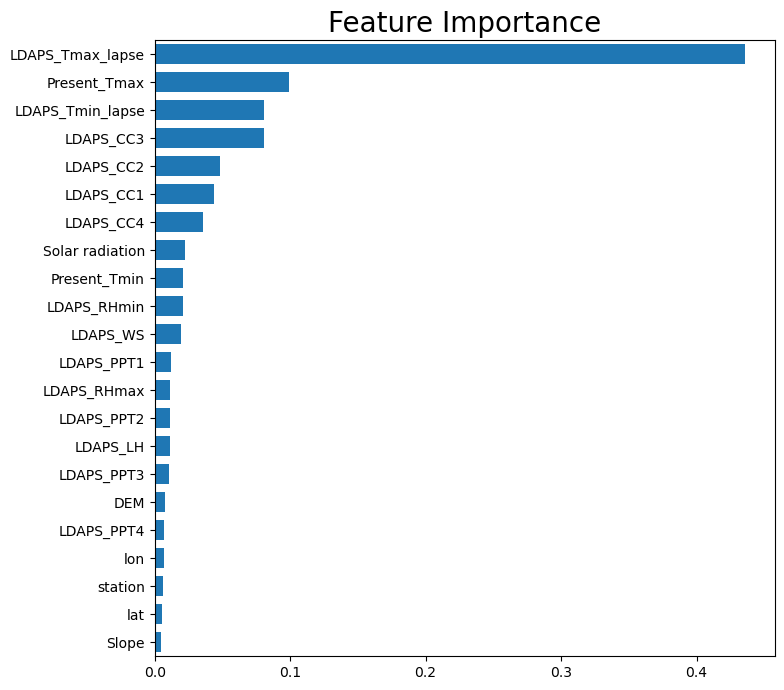

In [81]:
############################################################################
#                                                                          #
#                        Using ExtraTreesRegressor                         #
#                                                                          #
############################################################################

from sklearn.ensemble import ExtraTreesRegressor 
import matplotlib.pyplot as plt

# Create an ExtraTreesRegressor object. 
# 'n_estimators=100' specifies that 100 trees should be grown in this forest
# 'random_state=42' makes the randomness deterministic, allowing for reproducible results each time the code is run.
reg = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the regressor. 
reg = reg.fit(X, y)

# Output the feature importances.
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.to_string(index=False))

# Sort the feature importances in ascending order and get the indices
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)

# Create array of indices as float values which are offset by 0.5 to center align the labels
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

# Create a horizontal bar chart where the bar heights are the feature importances
# and use the sorted indices to order the bars. 
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.barh(tree_indices, reg.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(df.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(reg.feature_importances_)))
ax1.set_title('Feature Importance', fontsize = 20)
plt.show()

#
# ExtraTreeRegressor Analysis:
#
# The ExtraTreesClassifier is meant for discrete classification tasks, so in this case I will be using the
# ExtraTreesRegressor. This module can be used in data preprocessing to perform dimensionality reduction by
# performing feature importance analysis. This is done by creating a forest of randomly generated decision 
# trees, each of which fits the data independently, introducing randomness in the feature selection 
# process at each split point. The final result is determined by averaging the results of all the trees in 
# the forest. This method can be computationally expensive for large datasets (which can potentially be 
# addressed by reducing the number of trees to be genereated in the forest). This is because feature 
# importance is only obtained by training the model. ExtraTreesRegressor/ExtraTreesClassifier is not a 
# dimensionality reduction module by default. We are indirectly deriving feature selection from the output 
# of a trained model. 
#
# The feature importance is based on how much a feature contributes to reducing the variance within the leaves 
# of the decision trees. Features frequently appearing at split points and contributing significantly to 
# reducing variance are considered more important for prediction.
#
# Interpretation: 
#
# In this case we can see the importance determined by the forest displayed visually in the graph.
# LDAPS_Tmax_lapse is the most important feature, while Slope is the least important. If I was to 
# create a model with this information, I might choose the top 7 features in this case for my model.
#

In [82]:
############################################################################
#                                                                          #
#                          Using SelectFromModel                           #
#                                                                          #
############################################################################

# Import the 'SelectFromModel' class from the 'feature_selection' module of the 'sklearn' library.
# This class is used to select features based on the importance weights of another model.
from sklearn.feature_selection import SelectFromModel

# prefit = True indicates we have already fit the "reg" model.
model = SelectFromModel(reg, prefit=True)

# Transform the feature matrix 'X' using the initialized 'SelectFromModel' instance.
# The result is a new feature matrix 'X_new' that contains only the selected features.
X_new = model.transform(X)

# Show the dimensions after selection
print(f"\nNew shape of X: {X_new.shape}\n")

# Get indices of selected features for printing
selected_feature_indices = model.get_support(indices=True)
selected_features = ", ".join(X.columns[selected_feature_indices])
print(f"Features selected: {selected_features}\n")

# 
# SelectFromModel Analysis:
#
# SelectFromModel is a class used to select features based on the importance weights generated from
# another model. In this case, it pulls from the "feature_importances_" variable of the 
# ExtraTreesRegressor object passed into it. This module can not work directly with models that do not
# have these built in feature importance variables (e.g. "feature_importances", "coef").
#
# Feature selection is can be determined by passing a "k" value to the object, specifying how many features
# to select, or by passing a threshold that features must surpass to the object.
#
# Interpretation:
#
# In this case it seems that 5 features have been selected, which I have listed below.
#

C:\Users\laesc\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



New shape of X: (7585, 5)

Features selected: Present_Tmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_CC2, LDAPS_CC3

